# Google Play Store Game Analysis
#By- Aarush Kumar
#Dated: October 13,2021

In [1]:
from IPython.display import Image
Image(url='https://wallpaperaccess.com/full/1657557.jpg')

In [2]:
import math
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [3]:
filepath = '/home/aarush100616/Downloads/Projects/Top games on Playstore/Data/android-games.csv'
data = pd.read_csv(filepath)

In [4]:
df = data.copy()

In [5]:
df

rank                                         title  total ratings  \
0        1                  Garena Free Fire - The Cobra       80678661   
1        2                   PUBG MOBILE: Graffiti Prank       35971961   
2        3                     Mobile Legends: Bang Bang       25836869   
3        4                                   Brawl Stars       17181659   
4        5  Sniper 3D: Fun Free Online FPS Shooting Game       14237554   
...    ...                                           ...            ...   
1725    96                     Piknik Słowo - Word Snack         122845   
1726    97           Wordox – Free multiplayer word game         120476   
1727    98                             4 Fotos 1 Palavra         114852   
1728    99                 زوايا - لعبة ستحرك زوايا عقلك         110293   
1729   100         Word Life - Connect crosswords puzzle         109809   

     installs  average rating  growth (30 days)  growth (60 days)  price  \
0     500.0 M            4.33               2.9               7.9    0.0   
1     100.0 M            4.24               2.0               3.1    0.0   
2     100.0 M            4.08               1.6               3.3    0.0   
3     100.0 M            4.27               4.1               6.6    0.0   
4     100.0 M            4.33               0.8               1.8    0.0   
...       ...             ...               ...               ...    ...   
1725    1.0 M            4.67               0.1               0.3    0.0   
1726    1.0 M            4.21               0.0               0.1    0.0   
1727    5.0 M            4.52               0.3               0.6    0.0   
1728    1.0 M            4.76               0.8               1.9    0.0   
1729    5.0 M            4.38               6.9              14.2    0.0   

         category  5 star ratings  4 star ratings  3 star ratings  \
0     GAME ACTION        61935712         4478738         2795172   
1     GAME ACTION        26670566         2109631         1352610   
2     GAME ACTION        17850942         1796761         1066095   
3     GAME ACTION        12493668         1474319          741410   
4     GAME ACTION         9657878         2124544         1034025   
...           ...             ...             ...             ...   
1725    GAME WORD           96954           17233            5098   
1726    GAME WORD           74010           21546           10648   
1727    GAME WORD           84688           16783            6619   
1728    GAME WORD           99168            3528            3258   
1729    GAME WORD           70647           22630            8794   

      2 star ratings  1 star ratings   paid  
0            1814999         9654037  False  
1             893674         4945478  False  
2             725429         4397640  False  
3             383478         2088781  False  
4             375159         1045945  False  
...              ...             ...    ...  
1725            1249            2309  False  
1726            4710            9560  False  
1727            1867            4892  False  
1728            1059            3278  False  
1729            2775            4961  False  

[1730 rows x 15 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   float64
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(4), int64(7), object(3)
memory usage: 191.0+ KB


In [7]:
df.isnull().sum()

rank                0
title               0
total ratings       0
installs            0
average rating      0
growth (30 days)    0
growth (60 days)    0
price               0
category            0
5 star ratings      0
4 star ratings      0
3 star ratings      0
2 star ratings      0
1 star ratings      0
paid                0
dtype: int64

## Easy Data Visualization

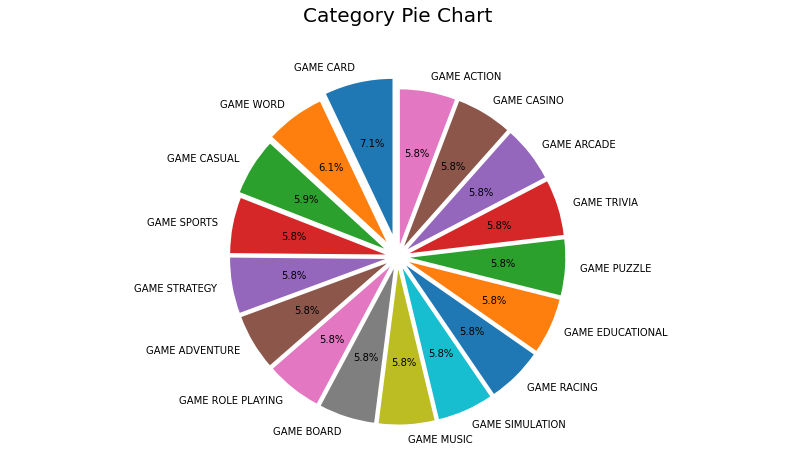

In [8]:
plt.figure(figsize=(14, 7))
labels=df['category'].value_counts().index
plt.pie(df['category'].value_counts().values,labels=labels,
        explode=[0.15, 0.12, 0.1, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08],
        autopct='%1.1f%%', startangle=90)
plt.title('Category Pie Chart',fontsize=20,pad=40)
plt.axis('equal')
plt.show()

In [9]:
def Paid(paid):
    if paid  == 0 : return 'Free'
    else: return 'Costs'
df['paid'] = df.apply(lambda x: Paid(x["paid"]), axis = 1)

In [10]:
plt.figure(figsize = (10, 7))
fig = px.histogram(df, x = 'paid',
                   title='Free vs Paid games',
                   labels={'paid':'Category'})
#ax = sns.countplot(x = "paid", data=df)
fig.show()

<Figure size 720x504 with 0 Axes>

In [11]:
import plotly.express as px
top_rated = df[0:10]
fig =px.sunburst(
    top_rated,
    path=['title', 'category', 'paid'],
    values='average rating',
    color='average rating',
)
fig.update_layout(
    grid= dict(columns=2, rows=1),
    margin = dict(t=0, l=0, r=0, b=0)
)
fig.show()

In [12]:
def Install(install):
    if install  == "10.0 M" : return 10000000
    elif install  == "50.0 M" : return 50000000
    elif install  == "5.0 M" : return 5000000
    elif install  == "100.0 M" : return 100000000
    elif install  == "1.0 M" : return 1000000
    elif install  == "500.0 k" : return 500000
    elif install  == "500.0 M" : return 500000000
    elif install  == "100.0 k" : return 100000
    else: return 1000000000
df['installs'] = df.apply(lambda x: Install(x["installs"]), axis = 1)

In [13]:
fig = px.bar(top_rated,
             x='title',
             y='installs',
             title='What are the most downloaded games?')
fig.update_xaxes(categoryorder = 'total descending')
fig.show()

As we could have predicted, the most popular games are also the ones most downloaded by users. In this graph we can see that the number of installations (the figure contained in the outermost circle) is almost always corresponding to the ranking (the position in the ranking is indicated by the number corresponding to the game, present in the innermost circle), the only exception is given by Temple Run 2. 